## Machine Learning for Time Series Data in Python | Time Series as Inputs to a Model


### `01: Many repetitions of sounds`
In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

- First, create the time array for these audio files (all audios are the same length).
- Then, stack the values of the two DataFrames together (`normal` and `abnormal`, in that order) so that you have a single array of shape (`n_audio_files`, `n_times_points`).
- Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.
- You'll plot normal heartbeats in the left column, and abnormal ones in the right column

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

abnormal = pd.read_csv("datasets/abnormal_sound.csv", index_col='time')
normal = pd.read_csv("datasets/normal_sound.csv", index_col='time')

def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()

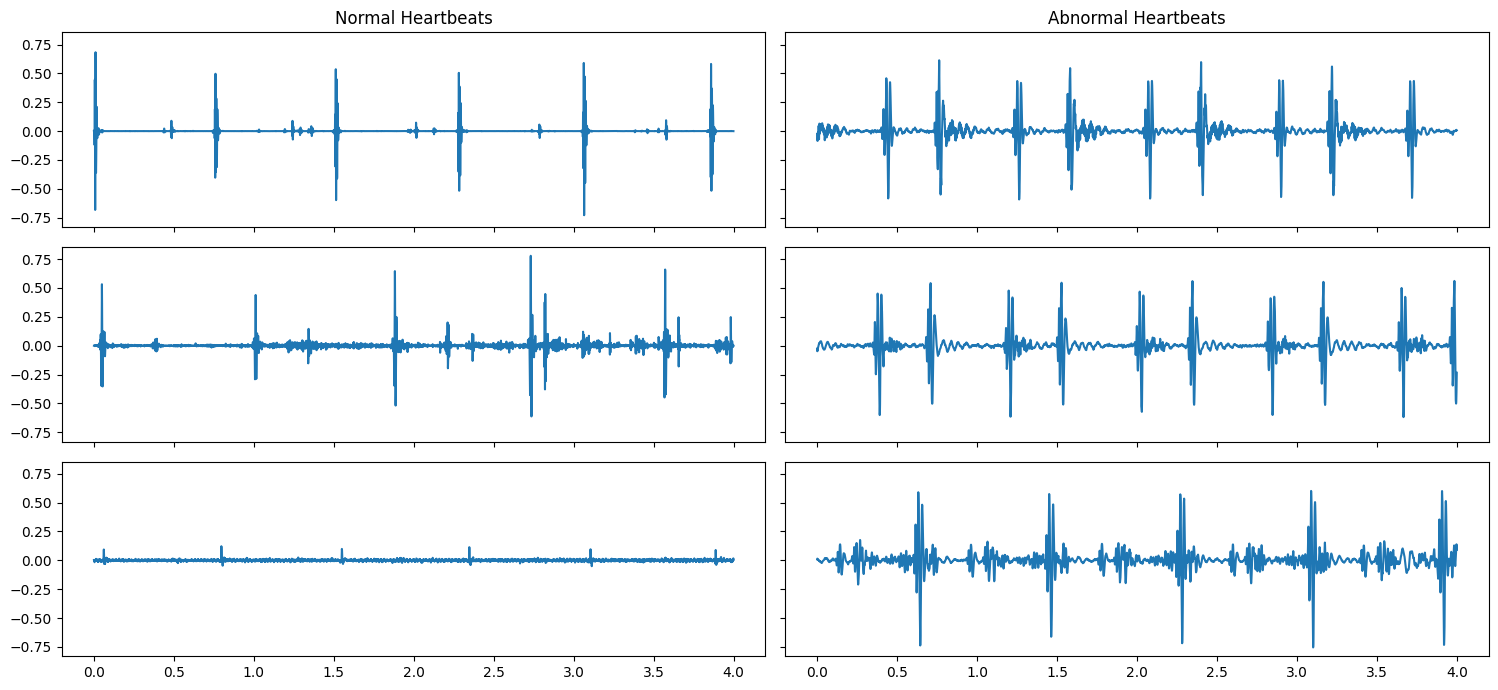

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(len(normal)) / 2205

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

💡 Correct! As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.

### `02: Invariance in time`
While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.

Average across the audio files contained in normal and abnormal, leaving the time dimension.
Visualize these averages over time.

- Average across the audio files contained in `normal` and `abnormal`, leaving the time dimension.
- Visualize these averages over time.

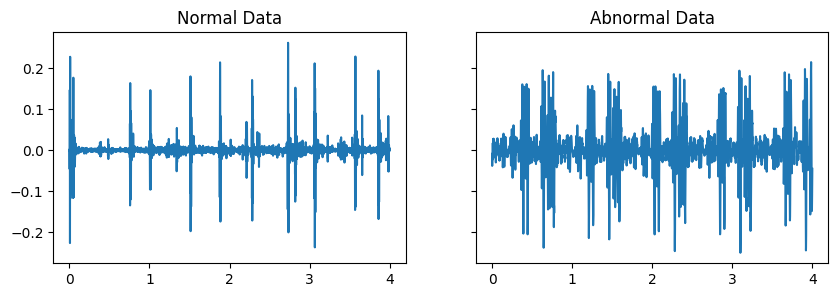

In [34]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

💡 Correct! Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.



### `03: Build a classification model` 

While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (`normal` and `abnormal`) into `X_train`, `X_test`, `y_train`, and `y_test`.

- Create an instance of the Linear SVC model and fit the model using the training data.
- Use the testing data to generate predictions with the model.
- Score the model using the provided code.

In [38]:
normal = pd.read_csv('./datasets/heart_normal.csv', index_col=0)
abnormal = pd.read_csv('./datasets/heart_abnormal.csv', index_col=0)

normal_train_idx = np.random.choice(normal.shape[1], size=22, replace=False).tolist()
normal_test_idx = list(set(np.arange(normal.shape[1]).tolist()) - set(normal_train_idx))

abnormal_train_idx = np.random.choice(abnormal.shape[1], size=20, replace=False).tolist()
abnormal_test_idx = list(set(np.arange(abnormal.shape[1]).tolist()) - set(abnormal_train_idx))

X_train = pd.concat([normal.iloc[:, normal_train_idx], 
                     abnormal.iloc[:, abnormal_train_idx]], axis=1).to_numpy().T
X_test = pd.concat([normal.iloc[:, normal_test_idx], 
                    abnormal.iloc[:, abnormal_test_idx]], axis=1).to_numpy().T

y_train = np.array(['normal'] * len(normal_train_idx) + ['abnormal'] * len(abnormal_train_idx))
y_test = np.array(['normal'] * len(normal_test_idx) + ['abnormal'] * len(abnormal_test_idx))

In [39]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

0.5


💡 Correct! Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.

